In [2]:
import pandas as pd 
import numpy as np
import geopandas as gpd

In [2]:
landregister_1740 = pd.read_csv("../public/data_raw/1740_Catastici_2025-09-24.tsv", sep="\t", index_col=0)
display(landregister_1740)

,uid,author,owner_code,owner_count,PP_OwnerCode,PP_OwnerCode_SIMPL,owner_name,ten_name,function,an_rendi,...,PP_Function_GEOMETRY,PP_Bottega_STD,PP_Bottega_COUNT,PP_Bottega_TRAD,PP_Bottega_METACATEGORY,PP_Owner_Title,PP_Owner_Entity,PP_Owner_FirstName,PP_Owner_LastName,PP_Owner_Notes
0,AGN-0001,Davide Drago,PPL,1,Private,Private,Paolina Franco,NaN,casa in soler rovinosa,NaN,...,SOLER,NaN,NaN,NaN,NaN,NaN,NaN,Paolina,FRANCO,PERSON
1,AGN-0002,Davide Drago,PPL,1,Private,Private,Nobil homo Andrea Vendramin,Francesco Palamon,casa in soler,22,...,SOLER,NaN,NaN,NaN,NaN,NOBIL HOMO,NaN,Andrea,VENDRAMIN,PERSON
2,AGN-0003,Davide Drago,PPL,1,Private,Private,Nobil homo Andrea Vendramin,Rovo Bognolo,casa in soler,32,...,SOLER,NaN,NaN,NaN,NaN,NOBIL HOMO,NaN,Andrea,VENDRAMIN,PERSON
3,AGN-0004,Davide Drago,PPL,1,Private,Private,Nobil homo Andrea Vendramin,Zuanne Fanti,casa in soler,28,...,SOLER,NaN,NaN,NaN,NaN,NOBIL HOMO,NaN,Andrea,VENDRAMIN,PERSON
4,AGN-0005,Davide Drago,PPL,1,Private,Private,Nobil homo Andrea Vendramin,Michiel Gasparini,casa in soler,18,...,SOLER,NaN,NaN,NaN,NaN,NOBIL HOMO,NaN,Andrea,VENDRAMIN,PERSON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31738,ZUL-0507,Francesca Zugno,PPL,1,Private,Private,Alvise Mocenigo,Vicenzo Albrizzi,Bottega sola,15,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Alvise,MOCENIGO,PERSON
31739,ZUL-0508,Francesca Zugno,PPL,1,Private,Private,Alvise Mocenigo,Ambroso Busi,Appartamento di Casa di sopra,33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alvise,MOCENIGO,PERSON
31740,ZUL-0509,Francesca Zugno,PPL,1,Private,Private,Alvise Mocenigo,Antonio Giuliani,Appartamento di casa di sotto,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Alvise,MOCENIGO,PERSON
31741,ZUL-0510,Francesca Zugno,PPL,1,Private,Private,Alvise Mocenigo,Antonio Berti,Bottega sola,15,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,Alvise,MOCENIGO,PERSON


In [3]:
merchants = pd.read_parquet("../public/data/merchants_dataset.parquet")
merchants.head()

,person,shop_count,shop_type,shop_type_eng,shop_category,shop_lat,shop_lng,house_lat,house_lng
0,Agostin Cigaggia,1,[FORMAGIER],[(Person) Cheese],[FOOD_DRINK],[5035730.88015714],[290857.01847614034],5.035731e+06,290857.018476
1,Agostin Fabris,1,[FORNER],[(Person) Oven],[FOOD_DRINK],[5035118.3089353675],[292354.62244628853],5.035118e+06,292354.622446
2,Agostin Lazari,1,[FABRO],[(Person) Forger],[METAL_CRAFT],[5035133.210374593],[291466.5331725448],5.035133e+06,291466.533173
3,Agostin Meneghetti,1,[ORESE],[(Object) Jewellery],[LUXURY_ITEMS],[5035425.966183827],[291536.64384332695],5.035484e+06,291391.043150
4,Agostin Redolfi,2,"[SCALETER, SCALETER]","[(Person) Pastries, (Person) Pastries]","[FOOD_DRINK, FOOD_DRINK]","[5035236.682245658, 5035237.392795577]","[291390.270486518, 291389.2441296375]",5.035237e+06,291390.270487


## Owners and tenants

In [ ]:
landregister_1740["ten_name_norm"] = (
    landregister_1740["ten_name"]
    .where(landregister_1740["ten_name"].notna())       
    .astype(str)
    .str.strip()
    .str.lower()
)
landregister_1740["owner_name_norm"] = (
    landregister_1740["owner_name"]
    .where(landregister_1740["owner_name"].notna())       
    .astype(str)
    .str.strip()
    .str.lower()
)

counts = landregister_1740["owner_name_norm"].dropna().value_counts()

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
counts[1:11].sort_values().plot(kind="barh", ax=ax, edgecolor="black")
ax.set_ylabel("Owner name")
ax.set_title("Most common owners")
plt.tight_layout()
plt.show()

counts = landregister_1740["ten_name_norm"].dropna().value_counts()
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
counts[1:11].sort_values().plot(kind="barh", ax=ax, edgecolor="black")
ax.set_ylabel("Tenant name")
ax.set_title("Most common tenants")
plt.tight_layout()
plt.show()


### Antonio Rossi

In [ ]:
landregister_1740[landregister_1740["ten_name_norm"] == "antonio rossi"]
# We can see here that there are 23 entries of Antonio Rossi, which rents many houses and is a barber, tailor and surgeon. This is strange.

,uid,author,owner_code,owner_count,PP_OwnerCode,PP_OwnerCode_SIMPL,owner_name,ten_name,function,an_rendi,...,PP_Bottega_COUNT,PP_Bottega_TRAD,PP_Bottega_METACATEGORY,PP_Owner_Title,PP_Owner_Entity,PP_Owner_FirstName,PP_Owner_LastName,PP_Owner_Notes,ten_name_norm,owner_name_norm
287,AGN-0288,Davide Drago,PPL,1,Private,Private,Lunardo Donà,Antonio Rossi,casa soler,74,...,NaN,NaN,NaN,NaN,NaN,Lunardo,DONA,PERSON,antonio rossi,lunardo donà
2483,BLD-0029,Francesca Zugno,PPL,1,Private,Private,Costantin Loredan,Antonio Rossi,Casa a pepian,24,...,NaN,NaN,NaN,NaN,NaN,Costantin,LOREDAN,PERSON,antonio rossi,costantin loredan
4902,CRO-0065,Francesca Zugno,PPL,1,Private,Private,Marin Ventura,Antonio Rossi,Casa,20,...,NaN,NaN,NaN,NaN,NaN,Marin,VENTURA,PERSON,antonio rossi,marin ventura
5267,CRO-0419,Francesca Zugno,PPL,1,Private,Private,Eminentissimo Cardinal Ottobon,Antonio Rossi,Casa,32,...,NaN,NaN,NaN,EMINENTISSIMO CARDINALE,NaN,NaN,OTTOBON,PERSON,antonio rossi,eminentissimo cardinal ottobon
6066,CSS-0425,Davide Drago,PPL,1,Private,Private,Nobil homo Anzolo Grassi,Antonio Rossi,casa,50,...,NaN,NaN,NaN,NOBIL HOMO,NaN,Anzolo,GRASSI,PERSON,antonio rossi,nobil homo anzolo grassi
7844,GDO-0212,Davide Drago,PPL,1,Private,Private,Domenico Franceschi,Antonio Rossi,NaN,24,...,NaN,NaN,NaN,NaN,NaN,Domenico,FRANCESCHI,PERSON,antonio rossi,domenico franceschi
14084,MFO-0383,Davide Drago,PPL,1,Private,Private,Nobil homo Zuane Donà,Antonio Rossi,casa,35,...,NaN,NaN,NaN,NOBIL HOMO,NaN,Zuane,DONA,PERSON,antonio rossi,nobil homo zuane donà
19342,MSE-0811a,Davide Drago,PPL,1,Private,Private,Zuanne Gradenigo de Vincenzo,Antonio Rossi,bottega da sartor e casa,49,...,1.0,(Person) Tailor,COMMERCE_CLOTHING,NaN,NaN,Zuanne,GRADENIGO DE VINCENZO,PERSON,antonio rossi,zuanne gradenigo de vincenzo
19343,MSE-0811b,Davide Drago,PPL_m,2,Private,Private,Piero procuratore pro tempore di Vito e Modest...,Antonio Rossi,bottega da sartor e casa,46,...,1.0,(Person) Tailor,COMMERCE_CLOTHING,"PROCURATORE,_",NaN,"Piero,Modesto","DE PICCOLI,DE PICCOLI",PERSON,antonio rossi,piero procuratore pro tempore di vito e modest...
19344,MSE-0811c,Davide Drago,PPL,1,Private,Private,Bortolo Tolusi,Antonio Rossi,bottega da sartor e casa,46,...,1.0,(Person) Tailor,COMMERCE_CLOTHING,NaN,NaN,Bortolo,TOLUSI,PERSON,antonio rossi,bortolo tolusi


In [ ]:
merchants[merchants["person"] == "Antonio Rossi"]
# After our clustering script, we get 3 instances of Antonio Rossi, which are merchants. One barber, one tailor (with many shops) and one surgeon.
# This seems historically more correct.

,person,shop_count,shop_type,shop_type_eng,shop_category,shop_lat,shop_lng,house_lat,house_lng
130,Antonio Rossi,1,[BARBIER],[(Person) Barber],[HEALTH_BEAUTY],[5034185.059069388],[290825.12096832634],5.034309e+06,290690.203129
131,Antonio Rossi,4,"[SARTOR, SARTOR, SARTOR, SARTOR]","[(Person) Tailor, (Person) Tailor, (Person) Ta...","[COMMERCE_CLOTHING, COMMERCE_CLOTHING, COMMERC...","[5034515.787231306, 5034514.004736165, 5034516...","[291557.80637145543, 291558.3156619151, 291560...",5.034516e+06,291557.806371
132,Antonio Rossi,1,[CHIRURGO],[(Person) Surgeon],[LIBERAL_PROFESSION],[5034677.170307603],[291127.9919987819],5.034654e+06,291110.847483


## Shop types and numbers

PP_Bottega_TRAD
(Person) Fruits                   241
(Person) Shoes                    210
(Person) Barber                   194
(Person) Sausage                  189
(Object) Jewellery                146
                                 ... 
(Person) Sweets                     1
(Person) Gondola tops               1
(Person) Surgeon                    1
(Person) Bean opening ('fava')      1
(Object) Wood                       1
Name: count, Length: 185, dtype: int64

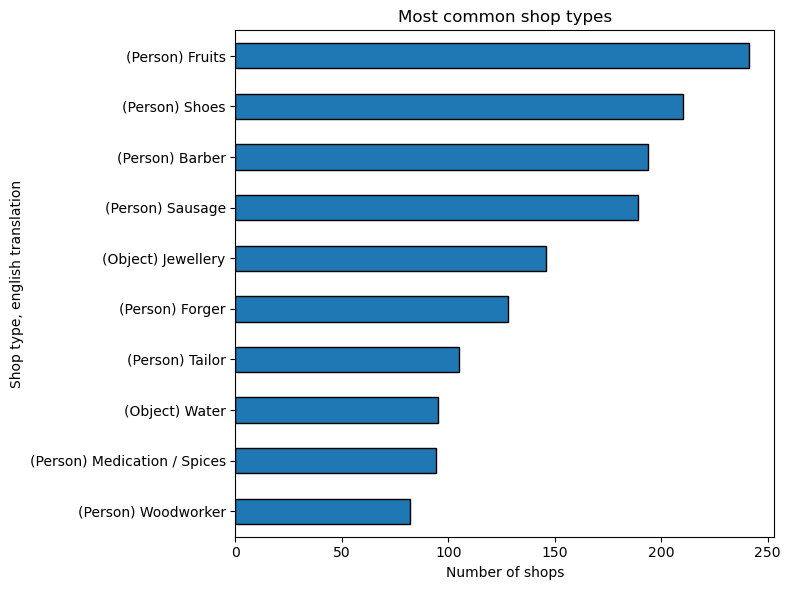

In [5]:
# show unique values of PP_Bottega_TRAD
# first split multiple values separated by commas into separate rows
landregister_1740 = landregister_1740.assign(
    PP_Bottega_TRAD=landregister_1740["PP_Bottega_TRAD"].str.split(",")
).explode("PP_Bottega_TRAD")

counts = landregister_1740["PP_Bottega_TRAD"].dropna().value_counts()
display(counts)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
counts[:10].sort_values().plot(kind="barh", ax=ax, edgecolor="black")
ax.set_xlabel("Number of shops")
ax.set_ylabel("Shop type, english translation")
ax.set_title("Most common shop types")
plt.tight_layout()
plt.show()


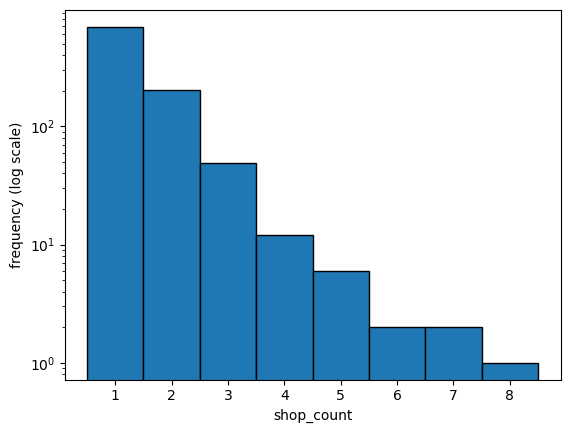

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

s = merchants["shop_count"].dropna().astype(int)
minv, maxv = s.min(), s.max()

# create half-step bins so bars are centered on integers
bins = np.arange(minv - 0.5, maxv + 1.5, 1)

fig, ax = plt.subplots()
ax.hist(s, bins=bins, log=True, edgecolor="black")
ax.set_xticks(np.arange(minv, maxv + 1))   # tick positions under bars (integer centers)
ax.set_xlabel("shop_count")
ax.set_ylabel("frequency (log scale)")
plt.show()

In [ ]:
# shop types for merchants with shop_count > 3
df = merchants[merchants["shop_count"] > 3].copy()
counts = df["shop_type_eng"].value_counts()
display(counts)


shop_type_eng
[(Object) Jewellery, (Object) Jewellery, (Object) Jewellery, (Object) Jewellery, (Object) Jewellery]                                                                                                                              1
[(Person) Cheese, (Person) Cheese, (Person) Cheese, (Person) Cheese, (Person) Cheese, (Person) Cheese, (Person) Cheese, (Person) Cheese]                                                                                          1
[(Person) Oranges, (Person) Oranges, (Person) Oranges, (Person) Oranges]                                                                                                                                                          1
[(Person) Cold meats,(Person) Fruits, (Person) Cold meats,(Person) Fruits, (Person) Cold meats,(Person) Fruits, (Person) Cold meats,(Person) Fruits, (Person) Cold meats,(Person) Fruits, (Person) Cold meats,(Person) Fruits]    1
[(Person) Tailor, (Person) Tailor, (Person) Tailor, (Person) Tailor, (Pers

## Parcels type

In [5]:
# show unique values of PP_Function_MID
# first split multiple values separated by commas into separate rows
landregister_1740 = landregister_1740.assign(
    PP_Function_MID=landregister_1740["PP_Function_MID"].str.split(",")
).explode("PP_Function_MID")

unique_values = landregister_1740["PP_Function_MID"].dropna().unique()
print("Unique values in 'PP_Function_MID':")
for value in unique_values:
    print(value)  

print("Total unique values:", len(unique_values))

Unique values in 'PP_Function_MID':
CASA
MAGAZZINO
BOTTEGA
INVIAMENTO
TERRENO
CAMERA
PALAZZO
SQUERO
OSPIZIO
POSTO
MEZZANINA
FORNO
SCUOLA
CASETTA
BASTION
PISTORIA
CARATI
LOCANDA
TEATRO
ORTO
LOCO
CASINO
APPARTAMENTO
VOLTA
TRAGHETTO
OSTERIA
TENTORIA
SAONARIA
POSTA
CANEVA
AFFITANZA
FONDACO
BANCO
GIARDINO
CHIESA
GRANARO
ALBERGO
CORTE
PROCURATIA
Total unique values: 39


In [6]:
# show unique values of PP_Function_MID
# first split multiple values separated by commas into separate rows

unique_values = landregister_1740["PP_Function_TOP"].dropna().unique()
print("Unique values in 'PP_Function_TOP':")
for value in unique_values:
    print(value)  

print("Total unique values:", len(unique_values))

Unique values in 'PP_Function_TOP':
CASA
MAGAZZINO
MIXED
INVIAMENTO
OTHER
BOTTEGA
TRAGHETTO
Total unique values: 7


In [7]:
# check unique values of PP_Function_MID with PP_Function_TOP = CASA
subset = landregister_1740[landregister_1740["PP_Function_TOP"] == "CASA"]
unique_values = subset["PP_Function_MID"].dropna().unique()
print("Unique values in 'PP_Function_MID' where 'PP_Function_TOP' == 'CASA':")
for value in unique_values:
    print(value)

Unique values in 'PP_Function_MID' where 'PP_Function_TOP' == 'CASA':
CASA
CAMERA
PALAZZO
MEZZANINA
CASETTA
APPARTAMENTO
AFFITANZA


## Point of interests location

In [3]:
poi = gpd.read_file("../public/data/POI_dataset.geojson")
poi.head()

,PP_Function_MID,PP_Bottega_STD,function,lat,lng,geometry
0,"CASA,BOTTEGA",LUGANEGHER,casa e bottega da luganegher,45.430275,12.329693,POINT (12.32969 45.43027)
1,"OSPIZIO,CAMERA",None,ospedaletto di sette camere,45.429518,12.329200,POINT (12.3292 45.42952)
2,BOTTEGA,TAGLIAPIETRA,bottega da tagiapiera,45.429109,12.328947,POINT (12.32895 45.42911)
3,"CASA,BOTTEGA",CALEGHER,casa e bottega da calegher,45.429198,12.328700,POINT (12.3287 45.4292)
4,"FORNO,INVIAMENTO",None,forno e inviamento,45.430736,12.329531,POINT (12.32953 45.43074)


In [7]:
import folium
from IPython.display import display, IFrame
from folium import Map, Element
import base64

def show_folium_safe(m : Map, height=500):
    """
    Displays a Folium map in a safe IFrame using Base64 encoding.
    This avoids "Trusted" errors, file path issues, and CSS leakage.
    """
    # 1. Get the raw HTML string of the map
    html_content = m.get_root().render()
    
    # 2. Encode the HTML to base64
    # This allows us to put the entire map "inside" the URL string
    encoded = base64.b64encode(html_content.encode('utf-8')).decode('utf-8')
    
    # 3. Create a Data URI
    data_uri = f"data:text/html;charset=utf-8;base64,{encoded}"
    
    # 4. Display the IFrame
    # We use width='100%' to fill the cell width, but the CSS is trapped inside
    display(IFrame(src=data_uri, width="80%", height=height))

# ensure lat/lon CRS
if poi.crs and poi.crs.to_string().lower() != "epsg:4326":
    poi = poi.to_crs(epsg=4326)

m = folium.Map(location=[45.437921763660306, 12.335331775712856], zoom_start=15, tiles="https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}@2x.png", attr="OpenStreetMap")

folium.TileLayer(
    tiles="https://geo-timemachine.epfl.ch/geoserver/www/tilesets/venice/sommarioni/{z}/{x}/{y}.png",
    attr="Time Atlas@EPFL",
    name="Sommarioni (historic)",
    overlay=True,
    control=True,
    opacity=0.6,
).add_to(m)

def add_markers(m: Map, type, color  = "#2a7ae2"):
    is_poi = ( poi["PP_Function_MID"].str.contains(type, case=False, na=False))
    pois = poi[is_poi].copy()
    for _, row in pois.iterrows():
        if row.geometry is None or row.geometry.is_empty:
            continue
        lon, lat = row.geometry.x, row.geometry.y
        popup_html = f"""
         {row.get('function')}<br/>
        """
        folium.CircleMarker(
            location=(lat, lon),
            radius=4,
            color=color,
            weight=1,
            fill=True,
            fill_color=color,
            fill_opacity=0.9,
            popup=folium.Popup(popup_html, max_width=300)
        ).add_to(m)
    return m
m = add_markers(m, "osteria")
m = add_markers(m, "locanda", color = "#e22a2a")
m = add_markers(m, "albergo", color = "#e22aba")
m = add_markers(m, "casino", color = "#2ae267")
m = add_markers(m, "teatro", color = "#2600ff")

legend = {
    "Osteria (tavern)": "#2a7ae2",
    "Locanda (inn)": "#e22a2a",
    "Albergo (hotel)": "#e22aba",
    "Casino (gambling house)": "#2ae267",
    "Teatro (theatre)": "#2600ff",
}

# Build legend HTML
legend_html = """
<div style="
    position: fixed;
    bottom: 50px;
    left: 10px;
    z-index: 9999;
    background: white;
    padding: 8px 10px;
    border: 1px solid #444;
    border-radius: 6px;
    box-shadow: 0 2px 6px rgba(0,0,0,0.25);
    font-size: 12px;
    line-height: 18px;
">
  <strong>Legend</strong>
  <div style="margin-top:6px;">
"""
for name, color in legend.items():
    legend_html += f'''
    <div style="display:flex;align-items:center;margin-top:6px;">
      <span style="display:inline-block;width:14px;height:14px;background:{color};border:1px solid #333;border-radius:3px;margin-right:8px;"></span>
      <span>{name}</span>
    </div>
    '''
legend_html += "</div></div>"
m.get_root().html.add_child(Element(legend_html))

# show map inline
show_folium_safe(m, height=700)